In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing related libaries

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Final project internship\Airport_Traffic.csv", encoding='latin-1',header=0)

Airport Traffic Dataset
Data description

The data provides the number of arrivals and departures from various data sources at the respective airports.
Column naming and types
  Column name	Data Source	        Label	    Description	Example
        YEAR	Network Manager	    YEAR	    Reference year	2014
    MONTH_NUM	Network Manager	    MONTH	    Month (numeric)	1
    MONTH_MON	Network Manager	    MONTH_MON	Month (3-letter code)	JAN
    FLT_DATE	Network Manager	    DATE_FLT	Date of flight	01-Jan-2014
    APT_ICAO	Network Manager	    APT_ICAO	ICAO 4-letter airport designator	EDDM
    APT_NAME	PRU	APT_NAME	    Airport name	Munich
   STATE_NAME	PRU	STATE_NAME	    Name of the country in which the airport is located	Germany
    FLT_DEP_1	Network Manager	    Departures - (NM)	Number of IFR departures	278
    FLT_ARR_1	Network Manager	    IFR arrivals - (NM)	Number of IFR arrivals	241
    FLT_TOT_1	Network Manager	    IFR flights (arr + dep) - (NM)	Number total IFR movements	519
FLT_DEP_IFR_2	Airport Operator	IFR departures - (APT)	Number of IFR departures	278
FLT_ARR_IFR_2	Airport Operator	IFR arrivals - (APT)	Number of IFR arrivals	241
FLT_TOT_IFR_2	Airport Operator	IFR flights (arr + dep) - (APT)	Number total IFR movements	519

link: https://ansperformance.eu/data/

In [3]:
df.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2016,1,JAN,01-01-2016,EBAW,Antwerp,Belgium,4,3,7,NaN,NaN,NaN,Antwerp (EBAW)
1,2016,1,JAN,01-01-2016,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,01-01-2016,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
3,2016,1,JAN,01-01-2016,EBLG,Liège,Belgium,6,7,13,NaN,NaN,NaN,Liège (EBLG)
4,2016,1,JAN,01-01-2016,EBOS,Ostend-Bruges,Belgium,7,7,14,NaN,NaN,NaN,Ostend-Bruges (EBOS)


In [4]:
# Check the null values
df.isnull().sum()

YEAR                  0
MONTH_NUM             0
MONTH_MON             0
FLT_DATE              0
APT_ICAO              0
APT_NAME              0
STATE_NAME            0
FLT_DEP_1             0
FLT_ARR_1             0
FLT_TOT_1             0
FLT_DEP_IFR_2    409986
FLT_ARR_IFR_2    409986
FLT_TOT_IFR_2    409986
Pivot Label           0
dtype: int64

In [5]:
df = df.dropna(axis=0)

In [6]:
df.isnull().sum()

YEAR             0
MONTH_NUM        0
MONTH_MON        0
FLT_DATE         0
APT_ICAO         0
APT_NAME         0
STATE_NAME       0
FLT_DEP_1        0
FLT_ARR_1        0
FLT_TOT_1        0
FLT_DEP_IFR_2    0
FLT_ARR_IFR_2    0
FLT_TOT_IFR_2    0
Pivot Label      0
dtype: int64

In [7]:
df.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
1,2016,1,JAN,01-01-2016,EBBR,Brussels,Belgium,174,171,345,174.0,161.0,335.0,Brussels (EBBR)
2,2016,1,JAN,01-01-2016,EBCI,Charleroi,Belgium,45,47,92,45.0,45.0,90.0,Charleroi (EBCI)
8,2016,1,JAN,01-01-2016,EDDF,Frankfurt,Germany,401,341,742,401.0,306.0,707.0,Frankfurt (EDDF)
10,2016,1,JAN,01-01-2016,EDDH,Hamburg,Germany,122,130,252,125.0,129.0,254.0,Hamburg (EDDH)
13,2016,1,JAN,01-01-2016,EDDM,Munich,Germany,276,236,512,276.0,232.0,508.0,Munich (EDDM)


In [8]:
df['STATE_NAME'].unique()

array(['Belgium', 'Germany', 'Estonia', 'Finland', 'United Kingdom',
       'Netherlands', 'Ireland', 'Denmark', 'Luxembourg', 'Norway',
       'Poland', 'Sweden', 'Latvia', 'Spain', 'Bulgaria', 'France',
       'Greece', 'Hungary', 'Italy', 'Slovenia', 'Czech Republic',
       'Malta', 'Austria', 'Romania', 'Switzerland', 'Portugal',
       'Croatia', 'Cyprus', 'Slovakia', 'Lithuania'], dtype=object)

In [9]:
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import * #for sorting based on month

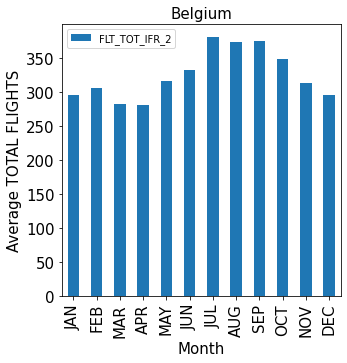

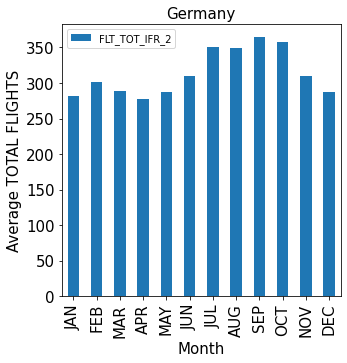

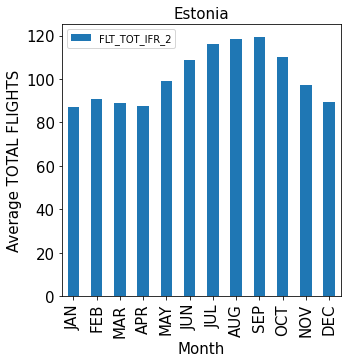

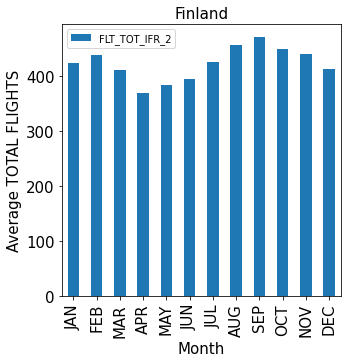

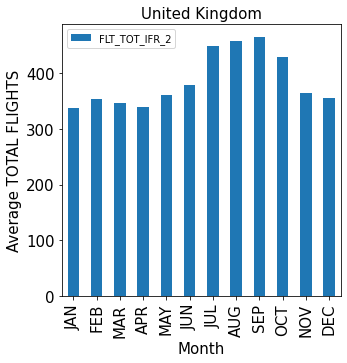

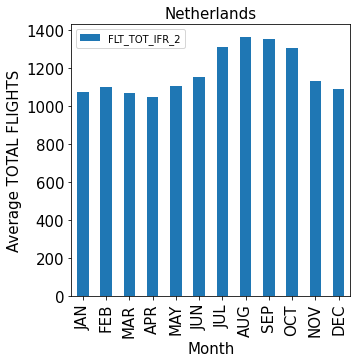

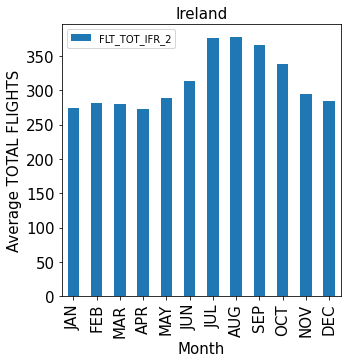

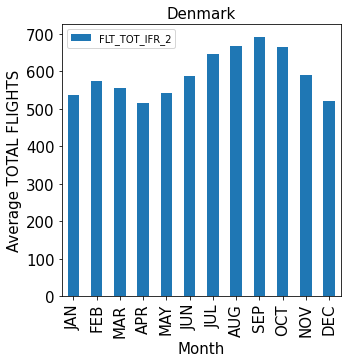

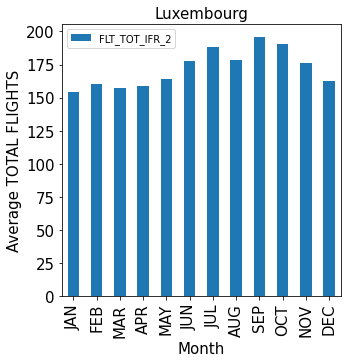

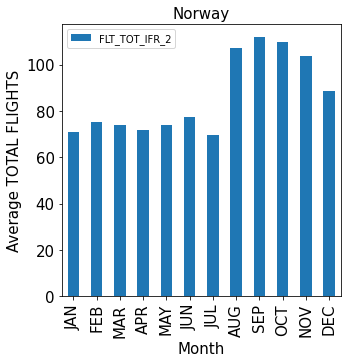

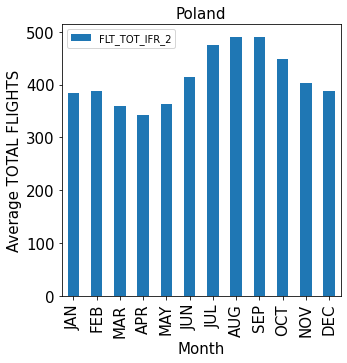

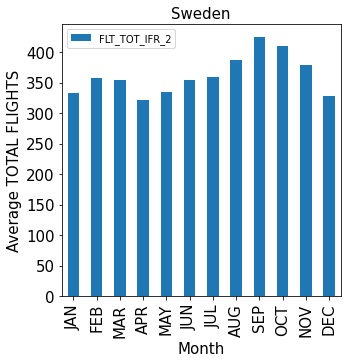

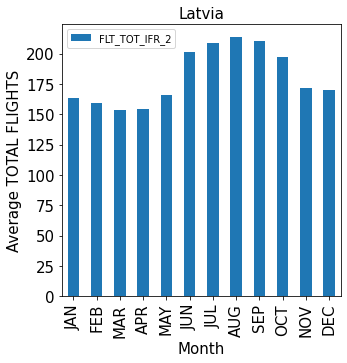

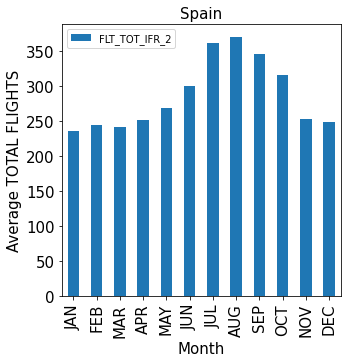

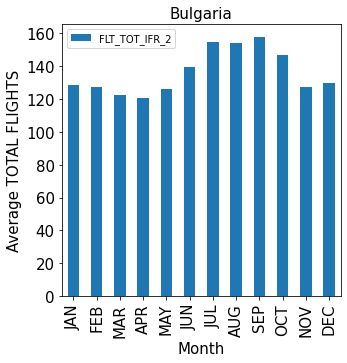

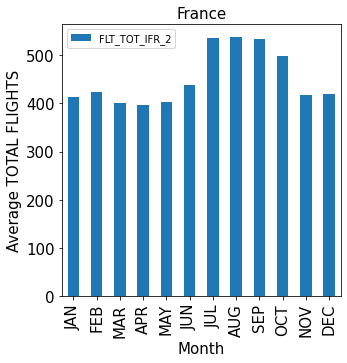

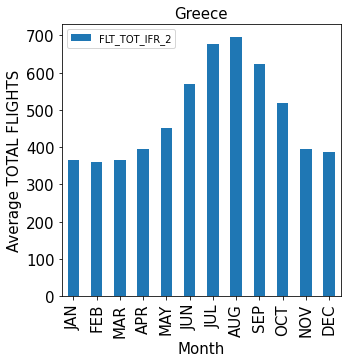

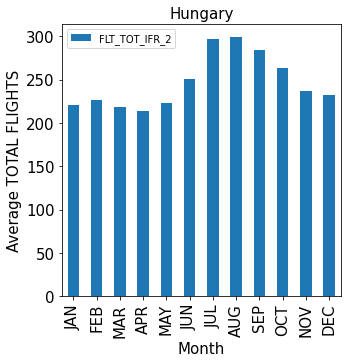

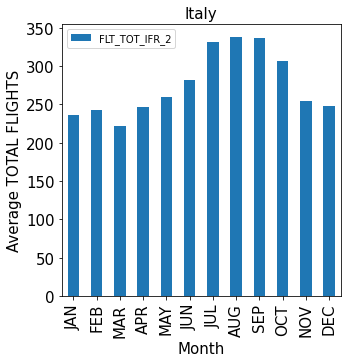

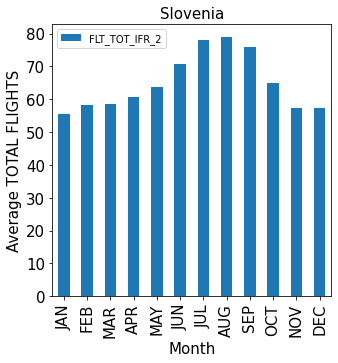

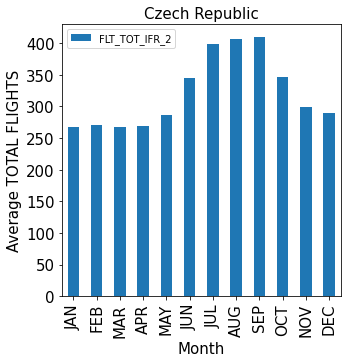

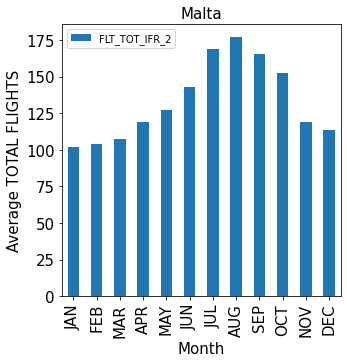

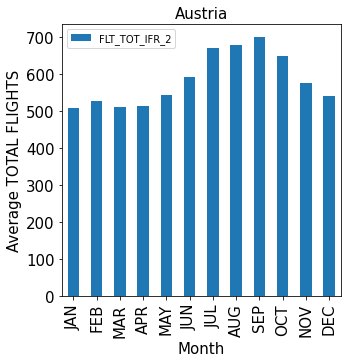

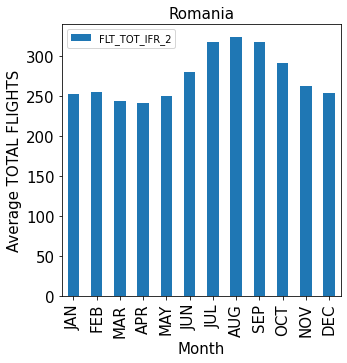

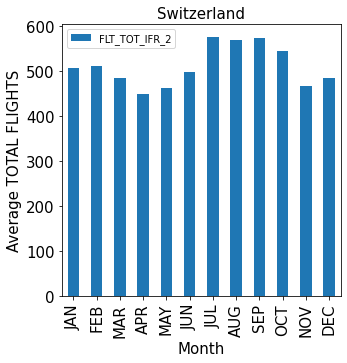

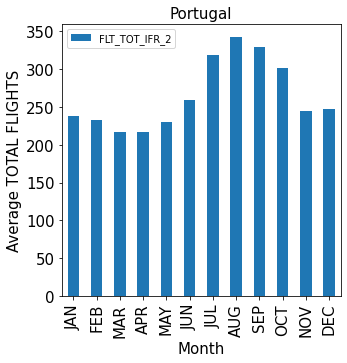

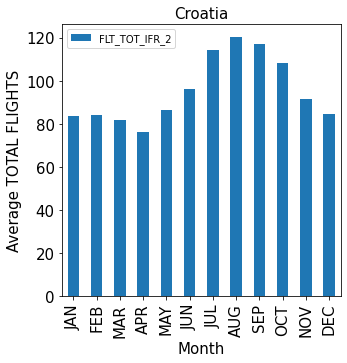

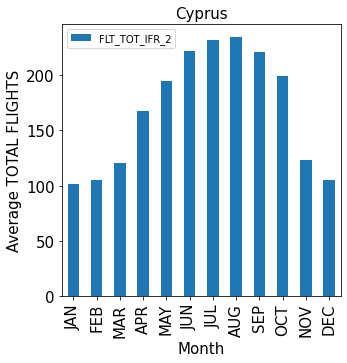

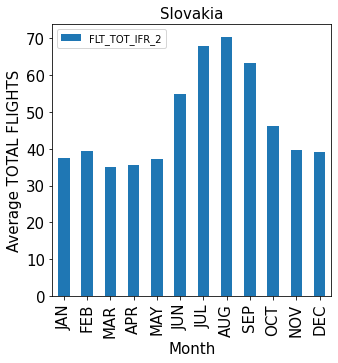

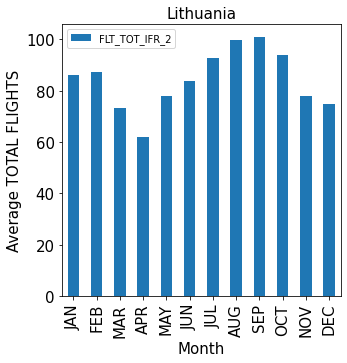

In [10]:
for i in df['STATE_NAME'].unique():
    
    df_month = df[['FLT_TOT_IFR_2', 'MONTH_MON']][df['STATE_NAME']==i].sort_values('MONTH_MON')
    
    df_month_avg = df_month.groupby('MONTH_MON', as_index=False)['FLT_TOT_IFR_2'].mean()
    
    df_month_avg_sort = Sort_Dataframeby_Month(df=df_month_avg,monthcolumnname='MONTH_MON')
    
    df_month_avg_sort.plot.bar(x='MONTH_MON', y='FLT_TOT_IFR_2', figsize = (5,5))

    plt.ylabel("Average TOTAL FLIGHTS",size=15)
    plt.xlabel("Month",size=15)
    plt.title(i, size = 15)
    plt.tick_params(labelsize=15)
    plt.show()

In [11]:
yr21 = df.loc[df["YEAR"] == 2021]

In [12]:
yr21.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
527682,2021,1,JAN,01-01-2021,EBBR,Brussels,Belgium,57,58,115,57.0,58.0,115.0,Brussels (EBBR)
527683,2021,1,JAN,01-01-2021,EBCI,Charleroi,Belgium,27,27,54,27.0,26.0,53.0,Charleroi (EBCI)
527686,2021,1,JAN,01-01-2021,EDDB,Berlin - Brandenburg,Germany,45,51,96,45.0,51.0,96.0,Berlin - Brandenburg (EDDB)
527687,2021,1,JAN,01-01-2021,EDDE,Erfurt,Germany,0,1,1,0.0,1.0,1.0,Erfurt (EDDE)
527688,2021,1,JAN,01-01-2021,EDDF,Frankfurt,Germany,144,122,266,144.0,122.0,266.0,Frankfurt (EDDF)


In [13]:
yr21=yr21.reset_index()

In [14]:
yr21.head()

,index,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,527682,2021,1,JAN,01-01-2021,EBBR,Brussels,Belgium,57,58,115,57.0,58.0,115.0,Brussels (EBBR)
1,527683,2021,1,JAN,01-01-2021,EBCI,Charleroi,Belgium,27,27,54,27.0,26.0,53.0,Charleroi (EBCI)
2,527686,2021,1,JAN,01-01-2021,EDDB,Berlin - Brandenburg,Germany,45,51,96,45.0,51.0,96.0,Berlin - Brandenburg (EDDB)
3,527687,2021,1,JAN,01-01-2021,EDDE,Erfurt,Germany,0,1,1,0.0,1.0,1.0,Erfurt (EDDE)
4,527688,2021,1,JAN,01-01-2021,EDDF,Frankfurt,Germany,144,122,266,144.0,122.0,266.0,Frankfurt (EDDF)


In [15]:
yr21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14793 entries, 0 to 14792
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          14793 non-null  int64  
 1   YEAR           14793 non-null  int64  
 2   MONTH_NUM      14793 non-null  int64  
 3   MONTH_MON      14793 non-null  object 
 4   FLT_DATE       14793 non-null  object 
 5   APT_ICAO       14793 non-null  object 
 6   APT_NAME       14793 non-null  object 
 7   STATE_NAME     14793 non-null  object 
 8   FLT_DEP_1      14793 non-null  int64  
 9   FLT_ARR_1      14793 non-null  int64  
 10  FLT_TOT_1      14793 non-null  int64  
 11  FLT_DEP_IFR_2  14793 non-null  float64
 12  FLT_ARR_IFR_2  14793 non-null  float64
 13  FLT_TOT_IFR_2  14793 non-null  float64
 14  Pivot Label    14793 non-null  object 
dtypes: float64(3), int64(6), object(6)
memory usage: 1.7+ MB


In [16]:
yr21 = yr21.drop("index" ,axis=1)

In [17]:
yr21.head()

,YEAR,MONTH_NUM,MONTH_MON,FLT_DATE,APT_ICAO,APT_NAME,STATE_NAME,FLT_DEP_1,FLT_ARR_1,FLT_TOT_1,FLT_DEP_IFR_2,FLT_ARR_IFR_2,FLT_TOT_IFR_2,Pivot Label
0,2021,1,JAN,01-01-2021,EBBR,Brussels,Belgium,57,58,115,57.0,58.0,115.0,Brussels (EBBR)
1,2021,1,JAN,01-01-2021,EBCI,Charleroi,Belgium,27,27,54,27.0,26.0,53.0,Charleroi (EBCI)
2,2021,1,JAN,01-01-2021,EDDB,Berlin - Brandenburg,Germany,45,51,96,45.0,51.0,96.0,Berlin - Brandenburg (EDDB)
3,2021,1,JAN,01-01-2021,EDDE,Erfurt,Germany,0,1,1,0.0,1.0,1.0,Erfurt (EDDE)
4,2021,1,JAN,01-01-2021,EDDF,Frankfurt,Germany,144,122,266,144.0,122.0,266.0,Frankfurt (EDDF)


<AxesSubplot:>

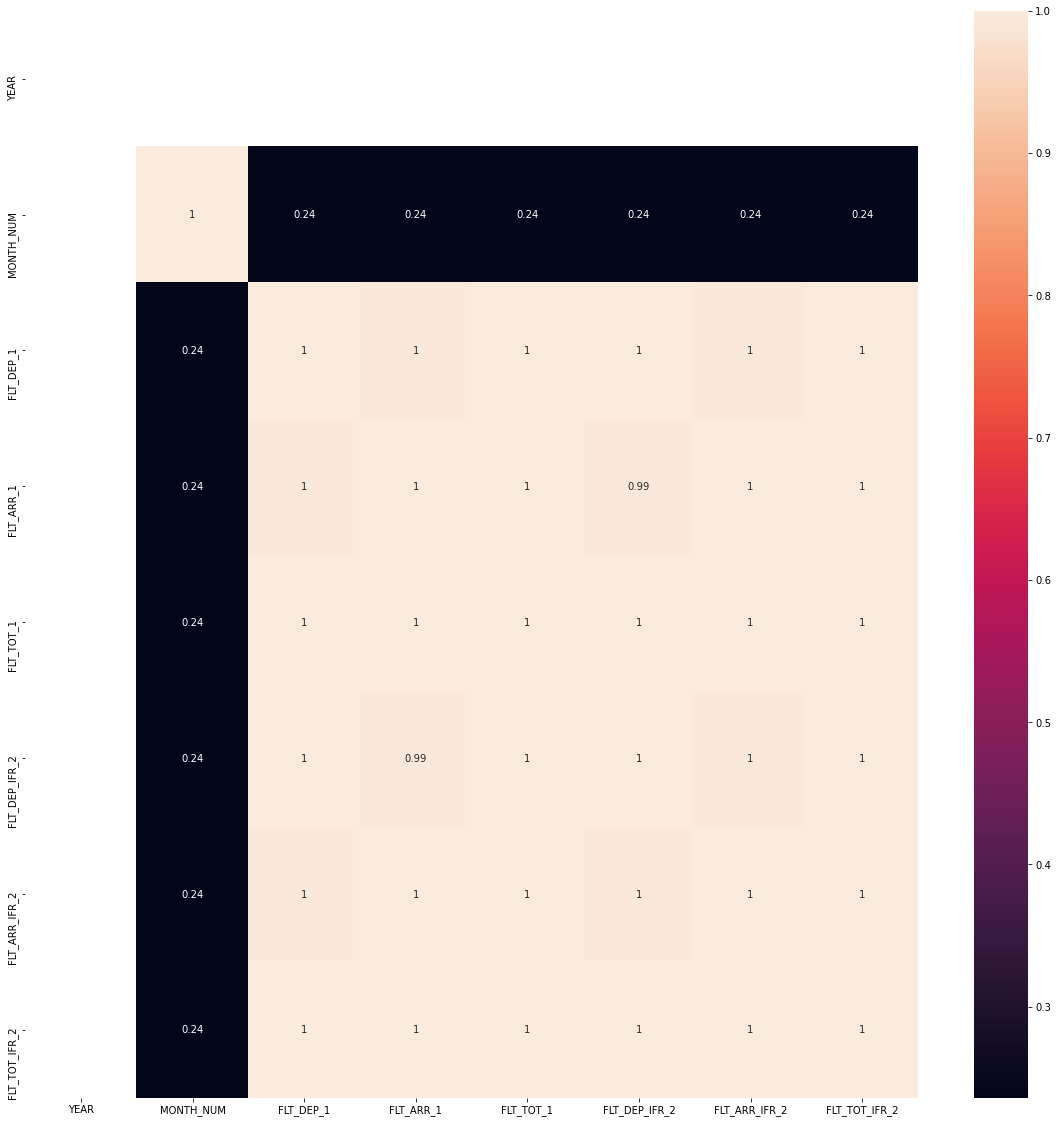

In [18]:
fig, ax = plt.subplots(figsize=(20,20))

corr = yr21.corr()
sns.heatmap(corr , annot = True , ax=ax)

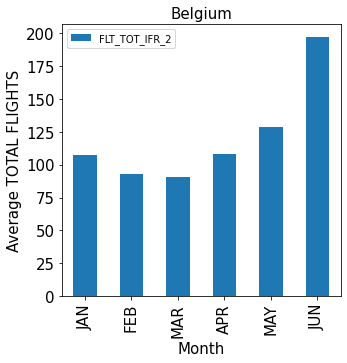

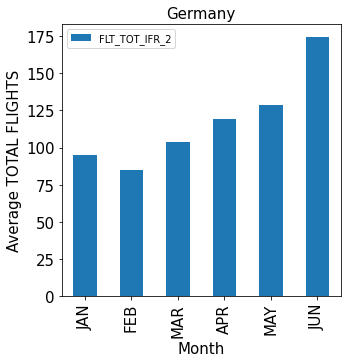

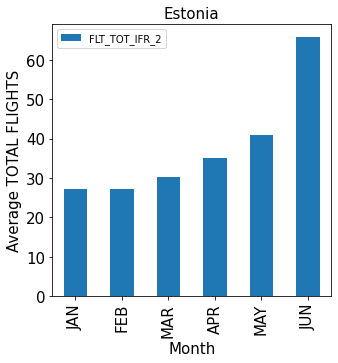

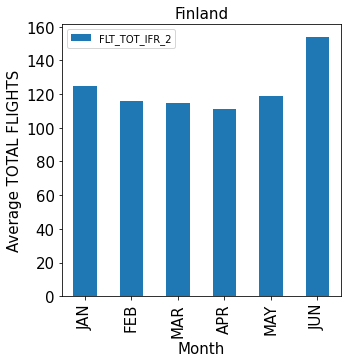

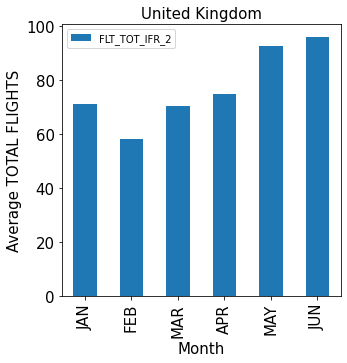

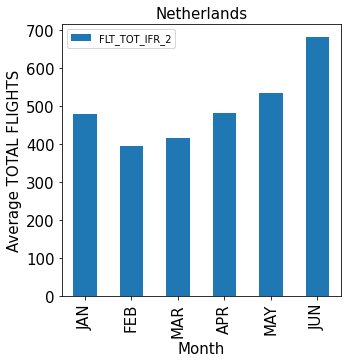

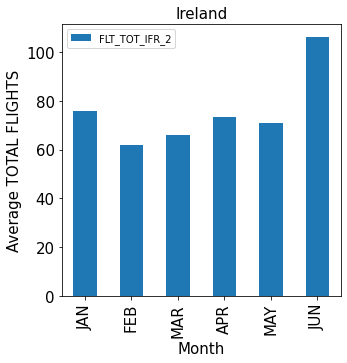

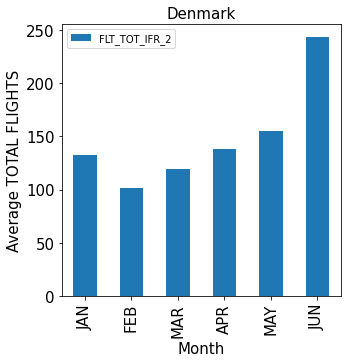

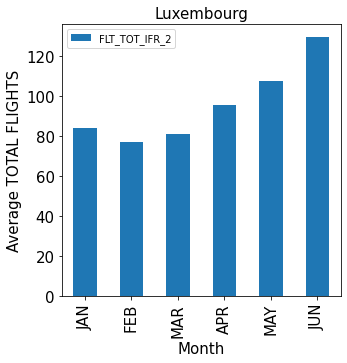

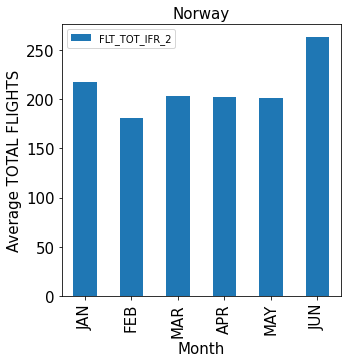

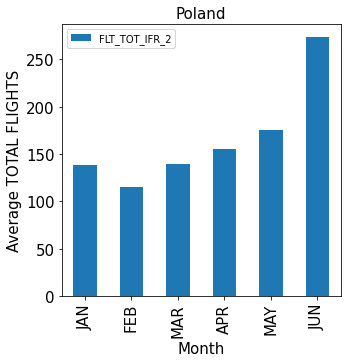

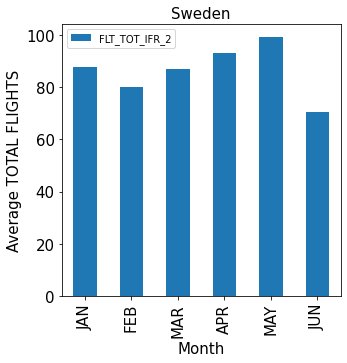

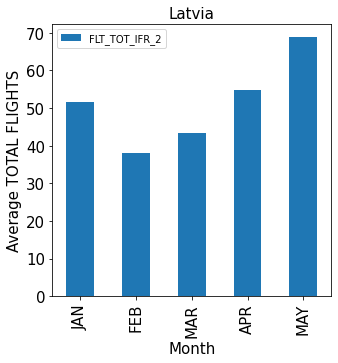

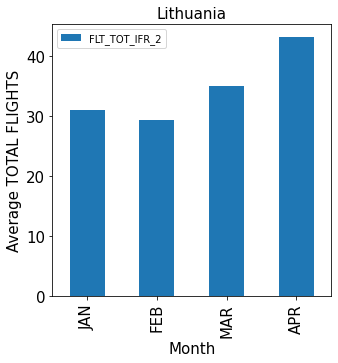

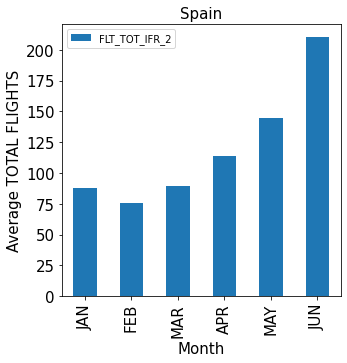

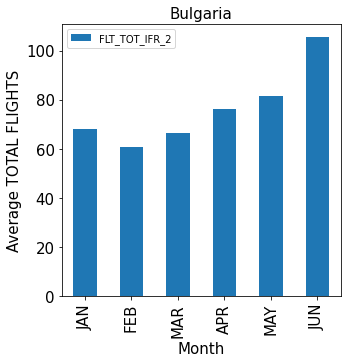

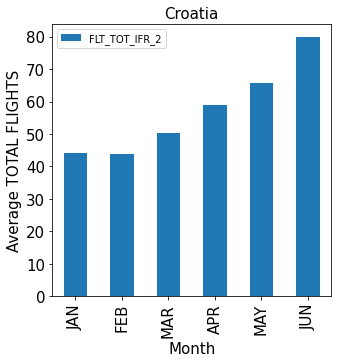

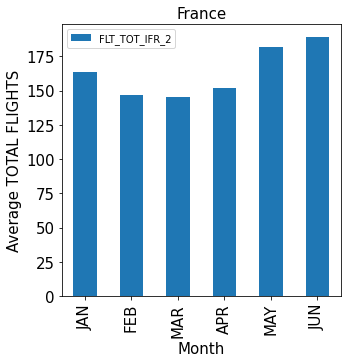

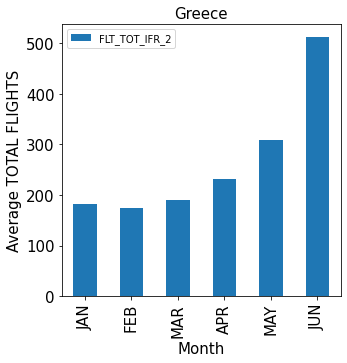

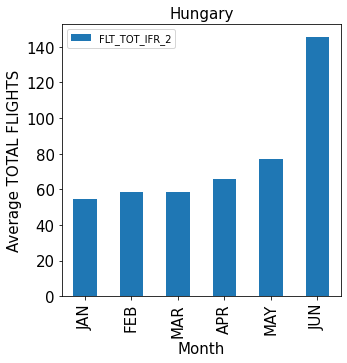

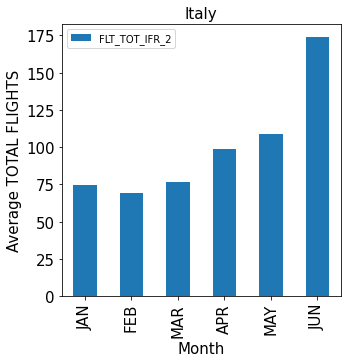

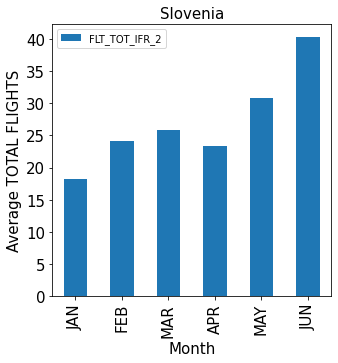

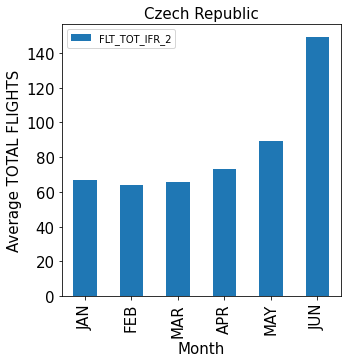

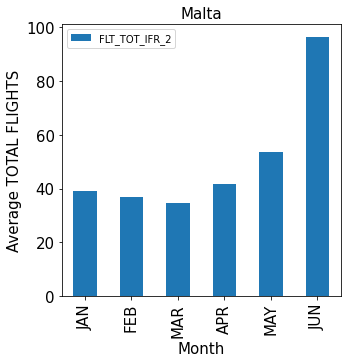

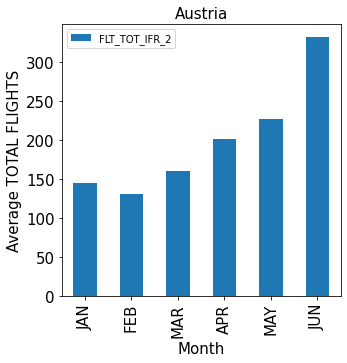

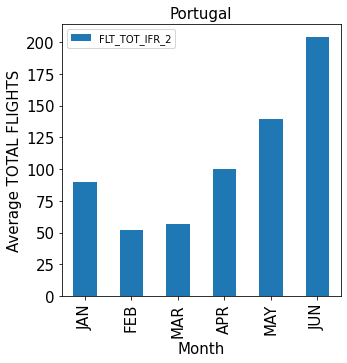

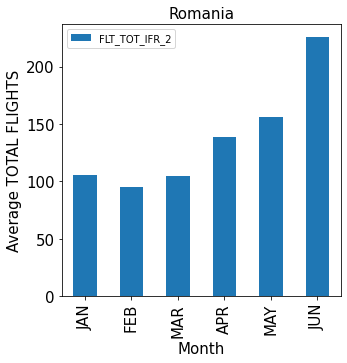

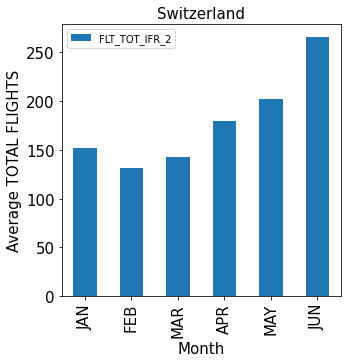

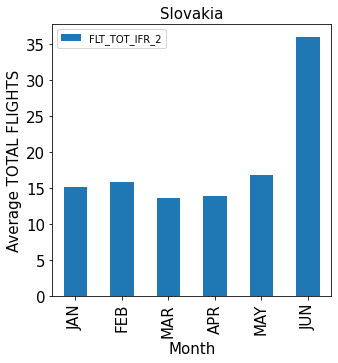

In [19]:
for i in yr21['STATE_NAME'].unique():
    
    df_month = yr21[['FLT_TOT_IFR_2', 'MONTH_MON']][yr21['STATE_NAME']==i].sort_values('MONTH_MON')
    
    df_month_avg = df_month.groupby('MONTH_MON', as_index=False)['FLT_TOT_IFR_2'].mean()
    
    df_month_avg_sort = Sort_Dataframeby_Month(df=df_month_avg,monthcolumnname='MONTH_MON')
    
    df_month_avg_sort.plot.bar(x='MONTH_MON', y='FLT_TOT_IFR_2', figsize = (5,5))

    plt.ylabel("Average TOTAL FLIGHTS",size=15)
    plt.xlabel("Month",size=15)
    plt.title(i, size = 15)
    plt.tick_params(labelsize=15)
    plt.show()

In [20]:
d_types = dict(yr21.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        print(f"<======== {name} ===========>")
        print(yr21[name].value_counts())
        print()

<======== MONTH_MON ===========>
JAN    2622
MAR    2566
MAY    2509
APR    2476
FEB    2341
JUN    2279
Name: MONTH_MON, dtype: int64

<======== FLT_DATE ===========>
12-01-2021    85
06-01-2021    85
08-01-2021    85
03-01-2021    85
14-01-2021    85
              ..
23-06-2021    76
06-06-2021    76
27-06-2021    76
19-06-2021    76
30-06-2021    75
Name: FLT_DATE, Length: 181, dtype: int64

<======== APT_ICAO ===========>
EDDL    181
LIPZ    181
EBCI    181
ENGM    181
EKCH    181
       ... 
EYVI    120
EGPD    120
EGPF     90
EGCC     59
EDDV     31
Name: APT_ICAO, Length: 86, dtype: int64

<======== APT_NAME ===========>
Oslo - Gardermoen      181
Bâle-Mulhouse          181
Bucharest - Otopeni    181
Faro                   181
Edinburgh              181
                      ... 
Vilnius                120
Aberdeen               120
Glasgow                 90
Manchester              59
Hanover                 31
Name: APT_NAME, Length: 86, dtype: int64

<======== STATE_NAME ====

In [21]:
from sklearn.preprocessing import LabelEncoder

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        yr21[name] = Le.fit_transform(yr21[name])

In [22]:
yr21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14793 entries, 0 to 14792
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YEAR           14793 non-null  int64  
 1   MONTH_NUM      14793 non-null  int64  
 2   MONTH_MON      14793 non-null  int32  
 3   FLT_DATE       14793 non-null  int32  
 4   APT_ICAO       14793 non-null  int32  
 5   APT_NAME       14793 non-null  int32  
 6   STATE_NAME     14793 non-null  int32  
 7   FLT_DEP_1      14793 non-null  int64  
 8   FLT_ARR_1      14793 non-null  int64  
 9   FLT_TOT_1      14793 non-null  int64  
 10  FLT_DEP_IFR_2  14793 non-null  float64
 11  FLT_ARR_IFR_2  14793 non-null  float64
 12  FLT_TOT_IFR_2  14793 non-null  float64
 13  Pivot Label    14793 non-null  int32  
dtypes: float64(3), int32(6), int64(5)
memory usage: 1.2 MB


In [23]:
X = yr21.iloc[:,:-1].values
Y = yr21.iloc[:,-1].values

In [24]:
X.shape , Y.shape

((14793, 13), (14793,))

In [25]:
from sklearn.model_selection import train_test_split 

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [26]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [27]:
Xtrain.shape , Xtest.shape

((11834, 13), (2959, 13))

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [29]:
y_pred = dtc.predict(Xtest)

In [30]:
y_pred

array([81, 34, 58, ..., 58, 30, 20])

In [31]:
Ytest

array([81, 34, 58, ..., 58, 30, 20])

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
lr_acc = accuracy_score(Ytest, y_pred)
print(lr_acc)

0.9989861439675566
